# Probabilidad y Estadística (C)

**2019 - 2doC**

---

> # Trabajo en laboratorio 3er encuentro:
> > # ***Estimadores.***

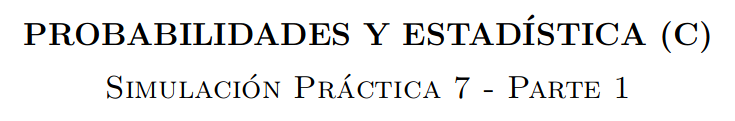



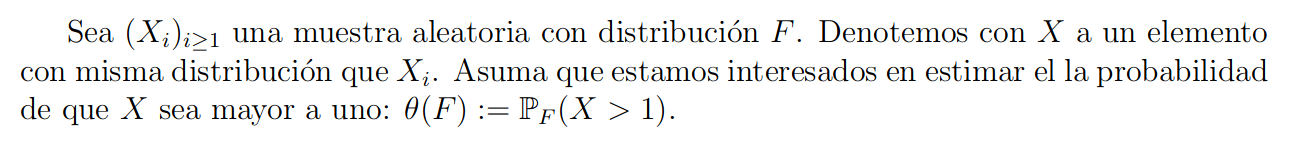

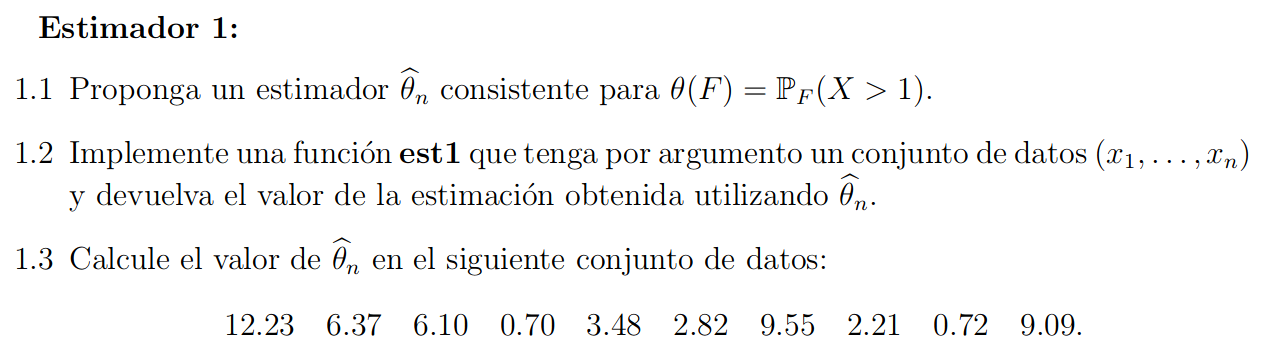

In [0]:
estimadorXMayorAUno <- function(data){
    n <- length(data)
    exitos <- length(data[data > 1])
    proporcion <- exitos / n
    return (proporcion)
}

In [3]:
data <- c(12.23, 6.37, 6.10, 0.70, 3.48,
           2.82, 9.55, 2.21, 0.72, 9.09)
data

[1] 12.23  6.37  6.10  0.70  3.48  2.82  9.55  2.21  0.72  9.09

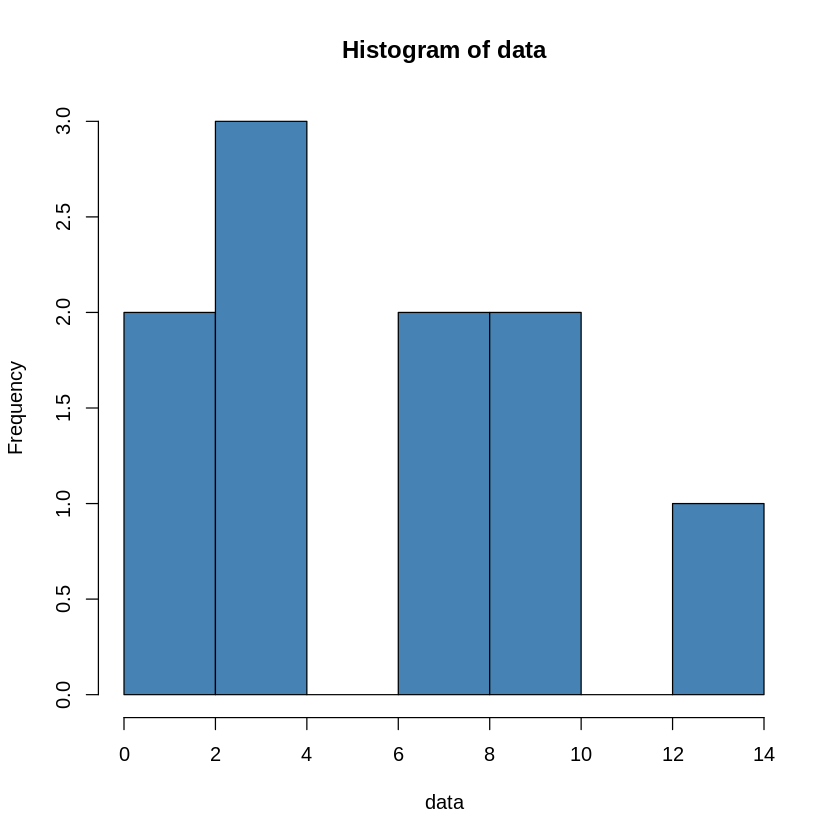

In [4]:
hist(data, col="steelblue")

In [5]:
theta_hat_n <- estimadorXMayorAUno(data)
theta_hat_n

[1] 0.8

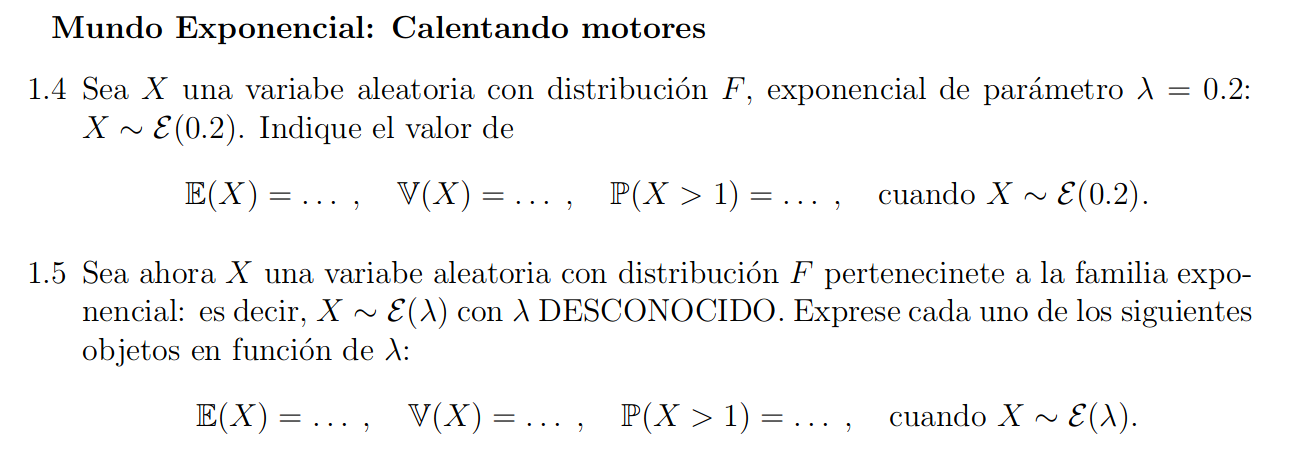

In [7]:
# 1.4
esperanza_exp <- 1/0.2
varianza_exp <- 1/0.2**2
P_X_Mayor_A_Uno <- 1 - (1 - exp(-0.2 * 1))

esperanza_exp
varianza_exp 
P_X_Mayor_A_Uno

[1] 5

[1] 25

[1] 0.8187308

In [8]:
# 1.5
esperanza_exp_sin_lambda <- mean(data)
varianza_exp_sin_lambda <- (mean(data)**2)
P_X_Mayor_A_Uno_sin_lambda <- 1 - (1 - exp(-1/mean(data) * 1))

esperanza_exp_sin_lambda
varianza_exp_sin_lambda
P_X_Mayor_A_Uno_sin_lambda

[1] 5.327

[1] 28.37693

[1] 0.8288443

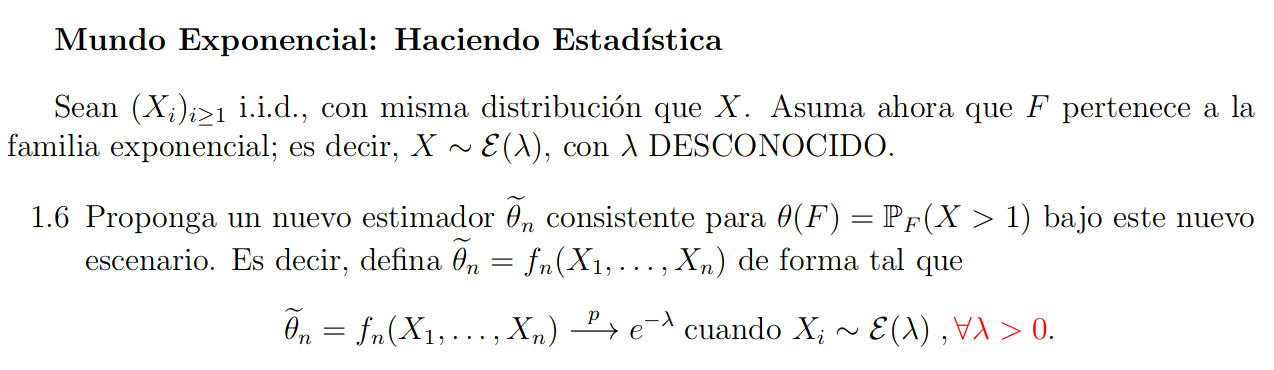

In [0]:
P_X_Mayor_A_Uno_sin_lambda <- 1 - (1 - exp(-1/mean(data) * 1))

In [0]:
estimadorXMayorAUnoExponencial <- function(data){
    # Uso funcion de distribucion exponencial
    k <- 1
    p <- 1 - (1 - exp(-1/mean(data) * k))
    return (p)
}

In [12]:
estimadorXMayorAUnoExponencial(data)

[1] 0.8288443

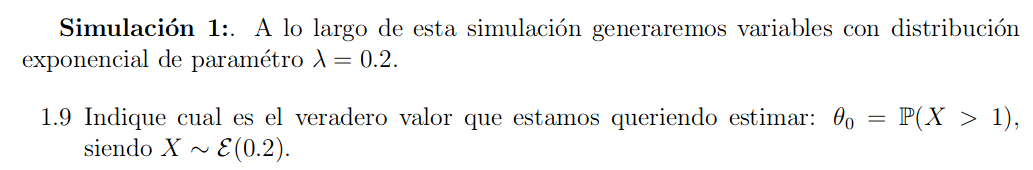

In [13]:
# 1.9
P_X_Mayor_A_Uno

[1] 0.8187308

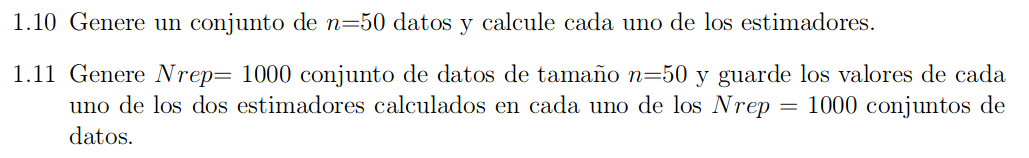

In [0]:
n <- 50
nrep <- 1000
lambda <- 0.2

estimarValor <- function(datos){
    estimacion <- data.frame(
      sin_modelo = estimadorXMayorAUno(datos),
      con_modelo = estimadorXMayorAUnoExponencial(datos)
    )
    return(estimacion)
}


In [15]:
estimarValor(rexp(n, lambda))

sin_modelo,con_modelo
<dbl>,<dbl>
0.94,0.8342053


In [0]:
repetirExperimentos <- function(n=50, nrep=1000){
    estimaciones <- data.frame(
      sin_modelo = rep(0, nrep),
      con_modelo = rep(0, nrep)
    )

    for(i in 1:nrep){
      temp <- estimarValor(rexp(n, lambda))
      estimaciones$sin_modelo[i] <- temp$sin_modelo
      estimaciones$con_modelo[i] <- temp$con_modelo
    }
    return (estimaciones)
}

In [17]:
resultados <- repetirExperimentos(n,nrep)

head(resultados, n=10)

sin_modelo,con_modelo
<dbl>,<dbl>
0.84,0.8314753
0.86,0.8153735
0.80,0.8269377
0.82,0.7724035
0.80,0.8028130
0.84,0.8264968
0.88,0.8307032
0.84,0.7773986
0.88,0.8032034


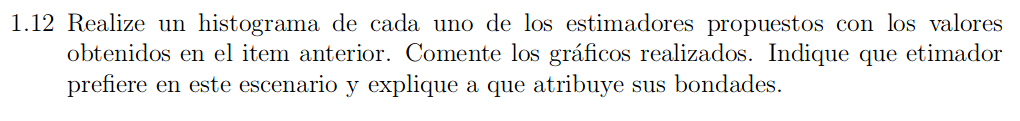

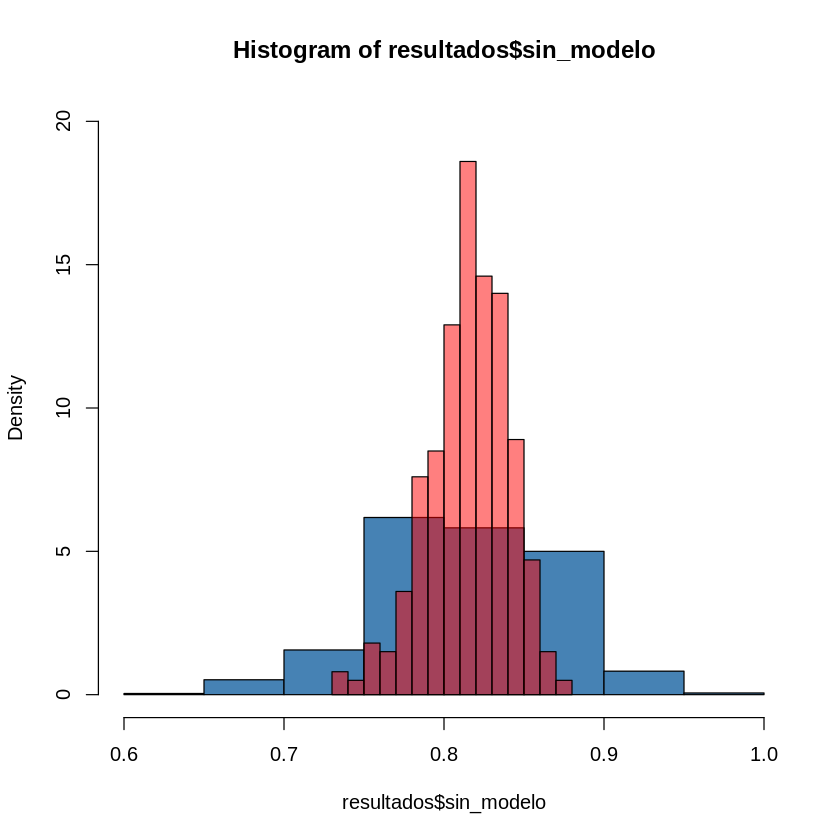

In [18]:
hist(resultados$sin_modelo, col="steelblue", freq=FALSE, ylim=c(0,20))
hist(resultados$con_modelo, col=rgb(1,0,0, alpha=0.5), freq=FALSE, add=T)

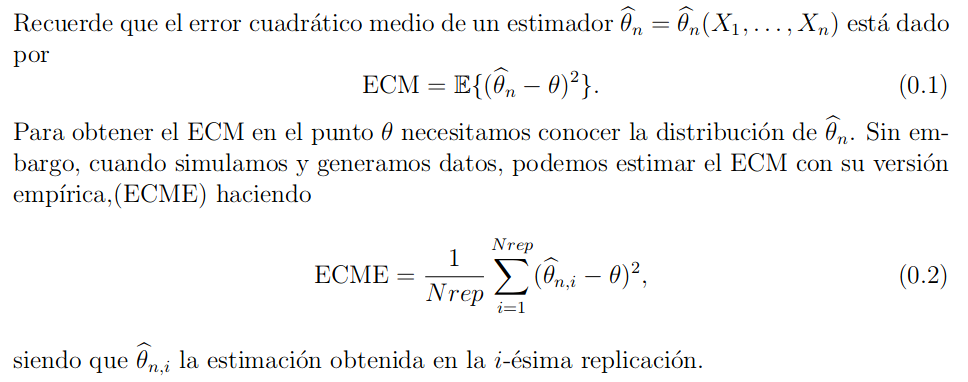

In [0]:
ECME <- function(estimaciones, theta){
    nrep <- length(estimaciones)
    return (sum((estimaciones-theta)**2)/nrep)
}

In [20]:
theta <- exp(-0.2)
ECME(resultados$sin_modelo, theta)
ECME(resultados$con_modelo, theta)

[1] 0.002982208

[1] 0.0006357395

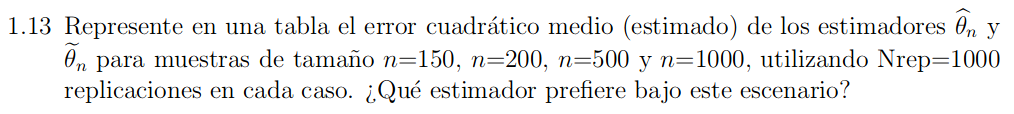

In [0]:
n <- c(50, 150, 250, 500, 1000)
nrep <- 1000
lambda <- 0.2

estimaciones <- data.frame(
    sin_modelo = rep(0, nrep),
    con_modelo = rep(0, nrep)
  )

experimentos <- list()
experimentos <- array(list(), dim=c(5,1))
# Llamo a repetirExperimentos(n, nrep=1000) con cada uno de los valores de n[i]
experimentos <- lapply(n, repetirExperimentos)



In [0]:
dim(experimentos) <- c(5,1)

In [53]:
head(experimentos[[1,  1]][1])

sin_modelo
<dbl>
0.80
0.68
0.84
0.82
0.78
0.74


In [70]:
head(experimentos[[5,  1]][[2]])

[1] 0.8207698 0.8087684 0.8193440 0.8083763 0.8095907 0.8157583

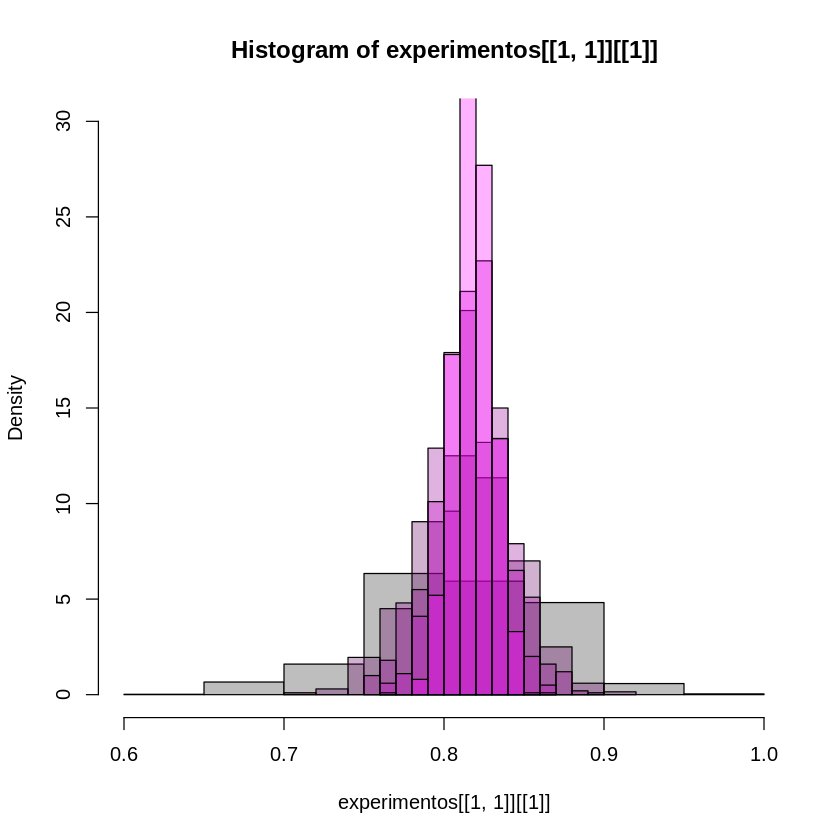

In [86]:
#hist(experimentos[1]$sin_modelo, col="red", freq=FALSE, ylim=c(0,30))
colors <- c("red","blue", "orange", "green", "black")
hist(experimentos[[1,  1]][[1]], col="grey", freq=FALSE, ylim=c(0,30))

for(i in 2:length(n)){
  hist(experimentos[[i,  1]][[1]], col=rgb(i*1/5, 0, i*1/5, alpha=0.3), add=T, freq=FALSE)
  #hist(experimentos[[i,  1]][[1]], col=colors[i], add=T, freq=FALSE, density =10+i)
}

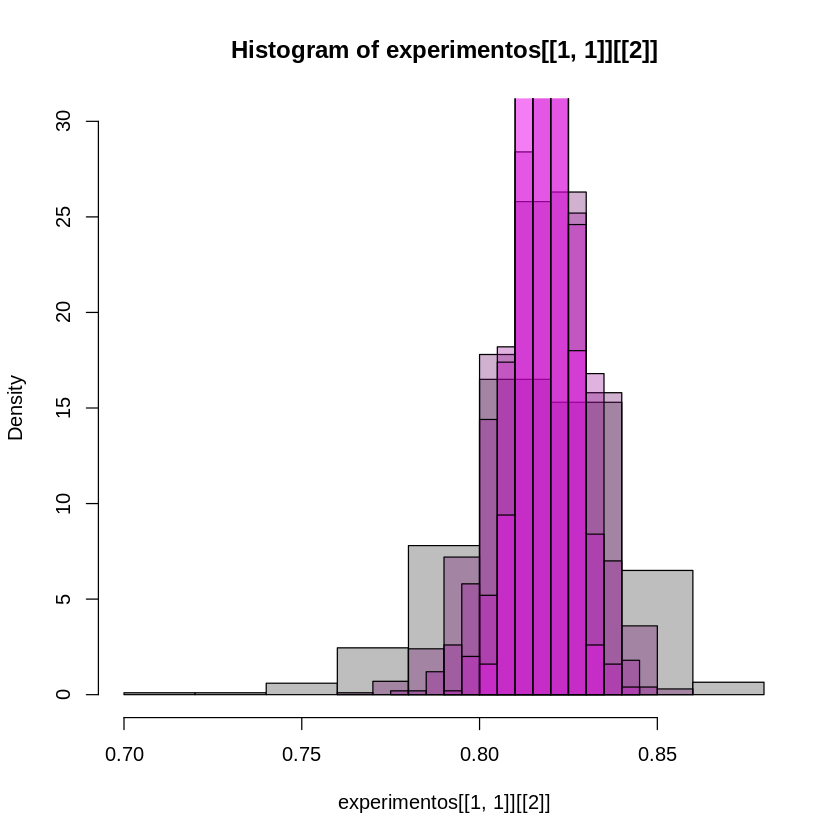

In [87]:
hist(experimentos[[1,  1]][[2]], col="grey", freq=FALSE, ylim=c(0,30))

for(i in 2:length(n)){
  hist(experimentos[[i,  1]][[2]], col=rgb(i*1/5, 0, i*1/5, alpha=0.3), add=T, freq=FALSE)
}

In [0]:
theta <- exp(-0.2)

experimento_50 <- repetirExperimentos(50, nrep)
experimento_150 <- repetirExperimentos(150, nrep)
experimento_200 <- repetirExperimentos(200, nrep)
experimento_500 <- repetirExperimentos(500, nrep)
experimento_1000 <- repetirExperimentos(1000, nrep)

print("50 elementos", quote=FALSE)
ECME(experimento_50$sin_modelo, theta)
ECME(experimento_50$con_modelo, theta)
dif_50 <- ECME(experimento_50$sin_modelo, theta)-ECME(experimento_50$con_modelo, theta)

print("150 elementos", quote=FALSE)
ECME(experimento_150$sin_modelo, theta)
ECME(experimento_150$con_modelo, theta)
dif_150 <-ECME(experimento_150$sin_modelo, theta)-ECME(experimento_150$con_modelo, theta)

print("200 elementos", quote=FALSE)
ECME(experimento_200$sin_modelo, theta)
ECME(experimento_200$con_modelo, theta)
dif_200 <-ECME(experimento_200$sin_modelo, theta)-ECME(experimento_200$con_modelo, theta)

print("500 elementos", quote=FALSE)
ECME(experimento_500$sin_modelo, theta)
ECME(experimento_500$con_modelo, theta)
dif_500 <-ECME(experimento_500$sin_modelo, theta)-ECME(experimento_500$con_modelo, theta)

print("1000 elementos", quote=FALSE)
ECME(experimento_1000$sin_modelo, theta)
ECME(experimento_1000$con_modelo, theta)
dif_1000 <-ECME(experimento_1000$sin_modelo, theta)-ECME(experimento_1000$con_modelo, theta)

[1] 50 elementos


[1] 0.002760836

[1] 0.0005835037

[1] 150 elementos


[1] 0.001027216

[1] 0.0001944782

[1] 200 elementos


[1] 0.0007229471

[1] 0.0001382681

[1] 500 elementos


[1] 0.0003055673

[1] 5.398896e-05

[1] 1000 elementos


[1] 0.000151502

[1] 2.948851e-05

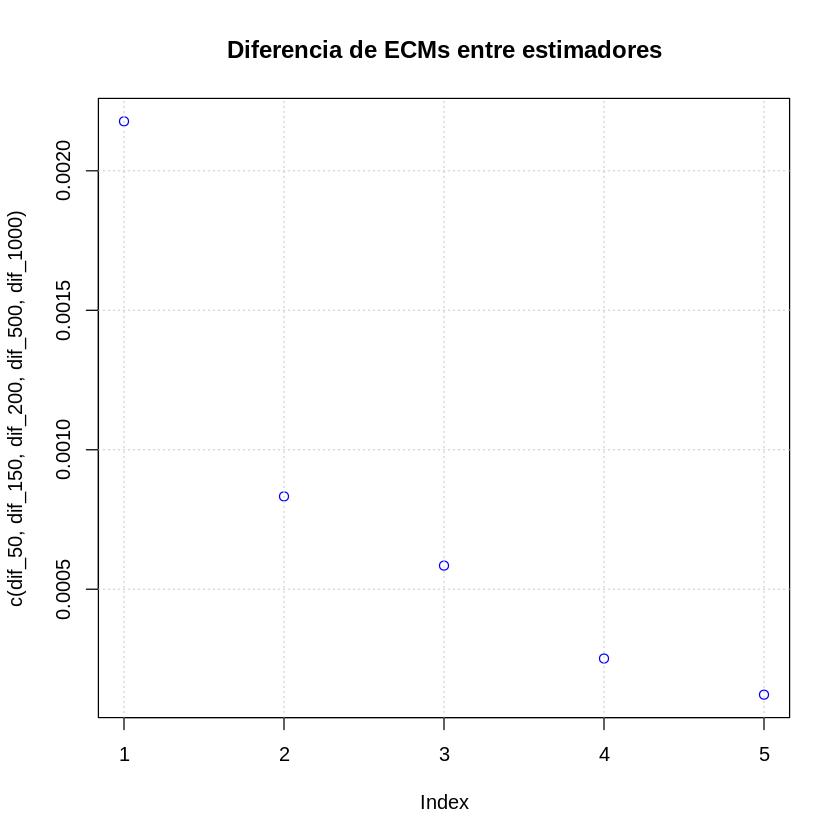

In [0]:
plot(c(dif_50, dif_150, dif_200, dif_500, dif_1000), col="blue", main="Diferencia de ECMs entre estimadores")
grid()

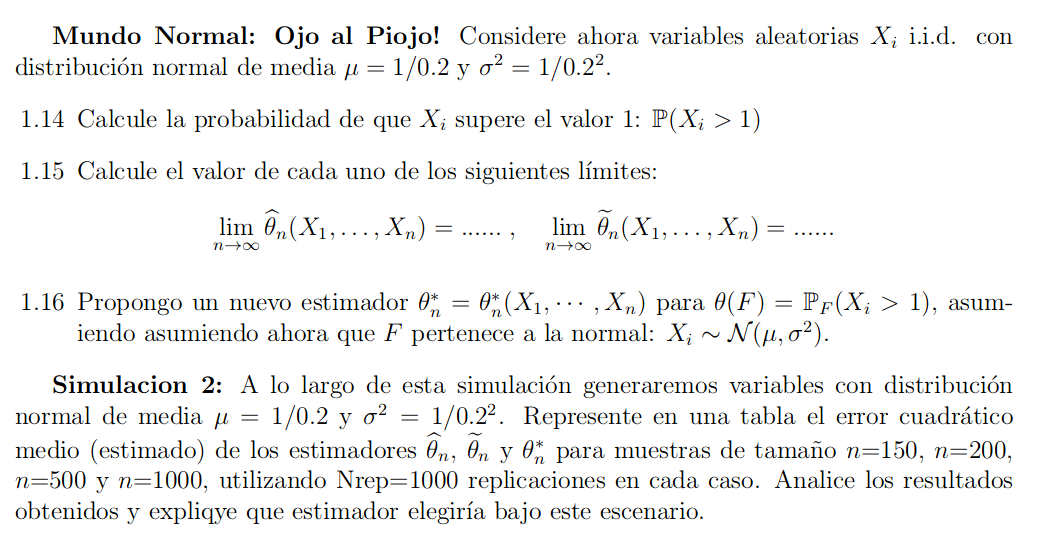

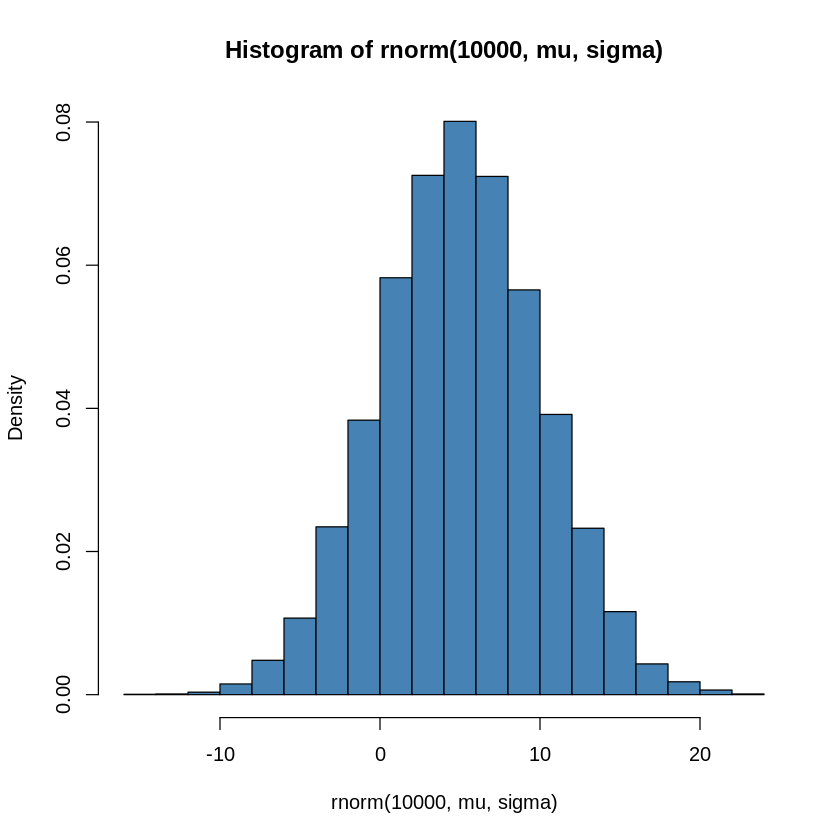

In [0]:
mu <- 1/0.2
sigma <- 1/0.2

hist(rnorm(10000, mu, sigma), col="steelblue", freq=FALSE)

In [0]:
1 - pnorm(1, mu, sigma)

[1] 0.7881446

In [0]:
repetirExperimentos <- function(n, nrep){
    estimaciones <- data.frame(
      sin_modelo = rep(0, nrep),
      con_modelo = rep(0, nrep)
    )

    for(i in 1:nrep){
      temp <- estimarValor(rnorm(n, mu, sigma))
      estimaciones$sin_modelo[i] <- temp$sin_modelo
      estimaciones$con_modelo[i] <- temp$con_modelo
    }
    return (estimaciones)
}

In [0]:
theta <- 0.8413*sigma+mu

experimento_50 <- repetirExperimentos(50, nrep)
experimento_150 <- repetirExperimentos(150, nrep)
experimento_200 <- repetirExperimentos(200, nrep)
experimento_500 <- repetirExperimentos(500, nrep)
experimento_1000 <- repetirExperimentos(1000, nrep)

print("50 elementos", quote=FALSE)
ECME(experimento_50$sin_modelo, theta)
ECME(experimento_50$con_modelo, theta)
dif_50 <- ECME(experimento_50$sin_modelo, theta)-ECME(experimento_50$con_modelo, theta)

print("150 elementos", quote=FALSE)
ECME(experimento_150$sin_modelo, theta)
ECME(experimento_150$con_modelo, theta)
dif_150 <-ECME(experimento_150$sin_modelo, theta)-ECME(experimento_150$con_modelo, theta)

print("200 elementos", quote=FALSE)
ECME(experimento_200$sin_modelo, theta)
ECME(experimento_200$con_modelo, theta)
dif_200 <-ECME(experimento_200$sin_modelo, theta)-ECME(experimento_200$con_modelo, theta)

print("500 elementos", quote=FALSE)
ECME(experimento_500$sin_modelo, theta)
ECME(experimento_500$con_modelo, theta)
dif_500 <-ECME(experimento_500$sin_modelo, theta)-ECME(experimento_500$con_modelo, theta)

print("1000 elementos", quote=FALSE)
ECME(experimento_1000$sin_modelo, theta)
ECME(experimento_1000$con_modelo, theta)
dif_1000 <-ECME(experimento_1000$sin_modelo, theta)-ECME(experimento_1000$con_modelo, theta)

[1] 50 elementos


[1] 70.83487

[1] 70.38407

[1] 150 elementos


[1] 70.8652

[1] 70.36842

[1] 200 elementos


[1] 70.86988

[1] 70.36284

[1] 500 elementos


[1] 70.85299

[1] 70.35811

[1] 1000 elementos


[1] 70.87243

[1] 70.35707